## Import Librery

In [201]:
#main Libraries
import pandas as pd
from pandas import DataFrame as df
import os
import numpy as np
#visualisation libreries
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

from fbprophet import Prophet
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance 
from skmultilearn.problem_transform import ClassifierChain 
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn import metrics
#Library for training
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import chardet

In [202]:
file = 'data_agriculture2.csv'
data_set = pd.read_csv(file, encoding='utf-8')
data_set

,idx,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,paCropName,paCropSpeId
0,1,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN
1,2,1/5/2017,춘천,74,2,1,7,52,0,0,들깨,PA100101
2,3,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN
3,4,1/27/2017,춘천,62,-1,2,2,33,5,8,들깨,PA100101
4,5,1/7/2017,춘천,89,0,0,7,54,0,4,들깨,PA100101
...,...,...,...,...,...,...,...,...,...,...,...,...
5668,5669,12/18/2020,제주,57,7,3,10,42,0,1,쪽파,PA290101
5669,5670,12/6/2020,제주,60,8,1,11,48,0,8,쪽파,PA290101
5670,5671,12/31/2020,제주,68,2,6,4,49,3,0,쪽파,PA290101
5671,5672,12/11/2020,제주,68,11,1,12,57,0,0,쪽파,PA290101


## Cleaning dataset

In [203]:
data = data_set.copy()

In [204]:
data.isnull().sum()

idx               0
date           1901
area           1901
dayAvgRhm         0
dayAvgTa          0
dayAvgWs          0
dayMaxTa          0
dayMinRhm         0
daySumRn          0
daySumSs          0
paCropName     1901
paCropSpeId    1901
dtype: int64

In [205]:
data = data.drop(['paCropSpeId', 'paCropName'], axis=1)

In [206]:
### dropping null 
data = data.dropna(how='any')

In [207]:
data.isnull().sum()

idx          0
date         0
area         0
dayAvgRhm    0
dayAvgTa     0
dayAvgWs     0
dayMaxTa     0
dayMinRhm    0
daySumRn     0
daySumSs     0
dtype: int64

In [208]:
# checking data type 
for dtype in data.dtypes.iteritems(): 
    print(dtype)

('idx', dtype('int64'))
('date', dtype('O'))
('area', dtype('O'))
('dayAvgRhm', dtype('int64'))
('dayAvgTa', dtype('int64'))
('dayAvgWs', dtype('int64'))
('dayMaxTa', dtype('int64'))
('dayMinRhm', dtype('int64'))
('daySumRn', dtype('int64'))
('daySumSs', dtype('int64'))


In [209]:
#transform string to day time 
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')
data.date.head()

1   2017-01-05
3   2017-01-27
4   2017-01-07
6   2017-01-03
8   2017-01-06
Name: date, dtype: datetime64[ns]

## Feature Modelisation

In [210]:
#Month & Day
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.head(10000)

,idx,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,month,day
1,2,2017-01-05,춘천,74,2,1,7,52,0,0,1,5
3,4,2017-01-27,춘천,62,-1,2,2,33,5,8,1,27
4,5,2017-01-07,춘천,89,0,0,7,54,0,4,1,7
6,7,2017-01-03,춘천,78,0,1,7,31,0,5,1,3
8,9,2017-01-06,춘천,77,3,0,10,41,0,7,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
5668,5669,2020-12-18,제주,57,7,3,10,42,0,1,12,18
5669,5670,2020-12-06,제주,60,8,1,11,48,0,8,12,6
5670,5671,2020-12-31,제주,68,2,6,4,49,3,0,12,31
5671,5672,2020-12-11,제주,68,11,1,12,57,0,0,12,11


In [211]:
### Label 
data['radsish'] = ((data.dayAvgTa < 21) & (data.dayAvgTa > 14)) & ((data.daySumRn < 7) & (data.daySumRn > 2))

In [212]:
data.head(1100)

,idx,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,month,day,radsish
1,2,2017-01-05,춘천,74,2,1,7,52,0,0,1,5,False
3,4,2017-01-27,춘천,62,-1,2,2,33,5,8,1,27,False
4,5,2017-01-07,춘천,89,0,0,7,54,0,4,1,7,False
6,7,2017-01-03,춘천,78,0,1,7,31,0,5,1,3,False
8,9,2017-01-06,춘천,77,3,0,10,41,0,7,1,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1319,2020-06-24,춘천,86,21,1,25,66,46,0,6,24,False
1319,1320,2020-06-04,춘천,68,24,2,29,45,0,10,6,4,False
1320,1321,2020-06-03,춘천,66,22,1,29,40,0,12,6,3,False
1321,1322,2020-06-22,춘천,54,27,1,36,22,0,13,6,22,False


## separate train with test

In [213]:
features = ['area', 'month']

In [214]:
X = data[features].values # we exclud date and idx
y = data.iloc[:, -1].values

In [215]:
print(X)

[['춘천' 1]
 ['춘천' 1]
 ['춘천' 1]
 ...
 ['제주' 12]
 ['제주' 12]
 ['제주' 12]]


In [216]:
print(y)

[False False False ... False False False]


In [217]:
## feature variable Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [218]:
print(X)

[[0.0 1.0 0.0 1]
 [0.0 1.0 0.0 1]
 [0.0 1.0 0.0 1]
 ...
 [1.0 0.0 0.0 12]
 [1.0 0.0 0.0 12]
 [1.0 0.0 0.0 12]]


In [219]:
## Encoding Label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Splitting the dataset into Trasining and Test set

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [221]:
print(X_train)

[[0.0 1.0 0.0 12]
 [1.0 0.0 0.0 3]
 [1.0 0.0 0.0 2]
 ...
 [0.0 0.0 1.0 4]
 [1.0 0.0 0.0 4]
 [1.0 0.0 0.0 9]]


In [222]:
print(X_test)

[[0.0 1.0 0.0 7]
 [0.0 0.0 1.0 1]
 [0.0 0.0 1.0 7]
 ...
 [0.0 1.0 0.0 9]
 [0.0 1.0 0.0 11]
 [0.0 0.0 1.0 3]]


In [223]:
print(y_train)

[0 0 0 ... 0 0 0]


## Feature Scaling 

In [224]:
X_train[:, 2:]

array([[0.0, 12],
       [0.0, 3],
       [0.0, 2],
       ...,
       [1.0, 4],
       [0.0, 4],
       [0.0, 9]], dtype=object)

In [225]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

In [226]:
X_train

array([[-0.72263393,  1.42447059, -0.69676046,  1.57452673],
       [ 1.38382652, -0.70201519, -0.69676046, -0.97698463],
       [ 1.38382652, -0.70201519, -0.69676046, -1.26048589],
       ...,
       [-0.72263393, -0.70201519,  1.43521348, -0.69348337],
       [ 1.38382652, -0.70201519, -0.69676046, -0.69348337],
       [ 1.38382652, -0.70201519, -0.69676046,  0.72402295]])

In [239]:
## training with random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [241]:
print(classifier.predict(sc.transform([[0.0, 0.0, 1.0, 5]])))

[0]


In [198]:
## predicting the test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[749   0]
 [  6   0]]


0.9920529801324504

## vizualization 

TypeError: Too many arguments to contourf; see help(contourf)

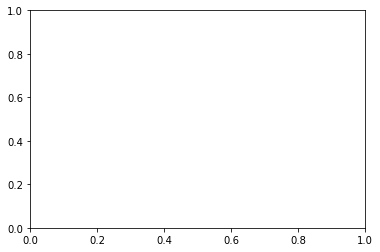

In [200]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2, X3, X4 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 2].min() - 10, stop = X_set[:, 2].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 3].min() - 10, stop = X_set[:, 3].max() + 10, step = 0.25)
                    )
plt.contourf(X1, X2, X3, X3, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel(), X3.ravel(), X4.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlim(X3.min(), X3.max())
plt.ylim(X4.min(), X4.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Month')
plt.ylabel('can produce or not')
plt.legend()
plt.show()